* Simple Moving Average
* Cumulative Moving Average
* Exponential Weight Moving Average
**************************************
Arima
* Moving Average(Formula) ----> ACF (ma)
* Autoregressive Model    ----> PACF (AR)

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
2017-12-11,21.934000,20.916668,20.975332,21.927334,119070000.0,21.927334
2017-12-12,22.762667,22.002001,22.030001,22.735332,130998000.0,22.735332


#### Simple Moving Average
* Rolling
* Simple Moving Average is used to "Smoothing OF Graph"

<AxesSubplot:xlabel='Date'>

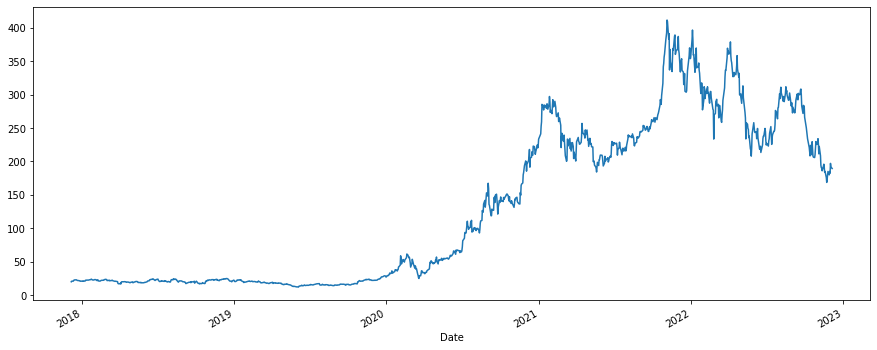

In [5]:
df_tesla['Open'].plot(figsize = (15,6))

We just want to create the simple moving average of this graph

In [6]:
# In case min.window = 1 it's mean atleast 1 window is required and mean() function  --> for "Simple Mean Avg"

In [8]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()

In [10]:
df_tesla[['Open','Open:10 days rolling']]

,Open,Open:10 days rolling
Date,,
2017-12-06,20.006666,20.006666
2017-12-07,20.799999,20.403333
2017-12-08,20.973333,20.593333
2017-12-11,20.975332,20.688833
2017-12-12,22.030001,20.957066
...,...,...
2022-11-29,184.990005,182.446004
2022-11-30,182.429993,181.101003
2022-12-01,197.080002,181.658003


<AxesSubplot:xlabel='Date'>

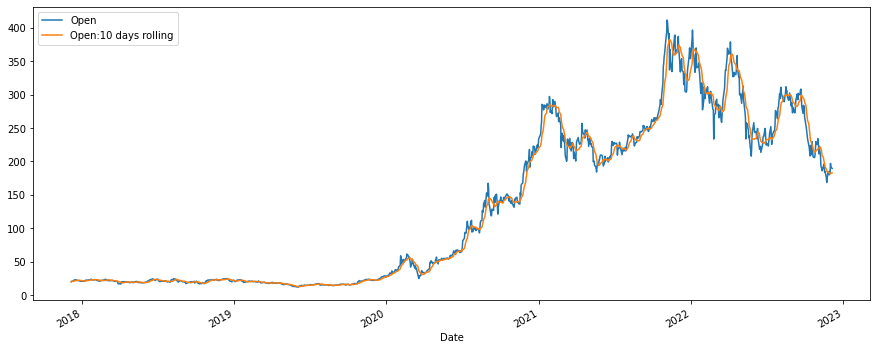

In [12]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

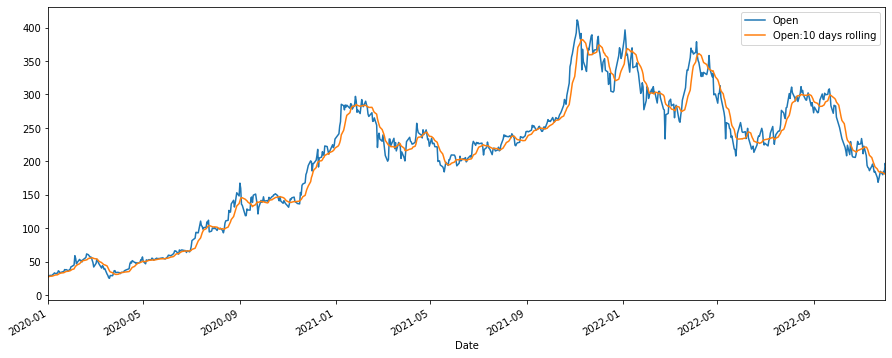

In [13]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim = ['2020-01-01','2022-12-01'],figsize = (15,6))

In [15]:
# Based on this we are geeting "Simple Moving Avg"
# 23:00 imp topic discuus

##### Note:-
* With the help of Simple Moving Avg for the short term is extensively used in the stock market
* we Depend on the 10 rolling window we can create as many rolling window 10,20,30 ..  as many and try to create this specific graph and see how it's work


<AxesSubplot:xlabel='Date'>

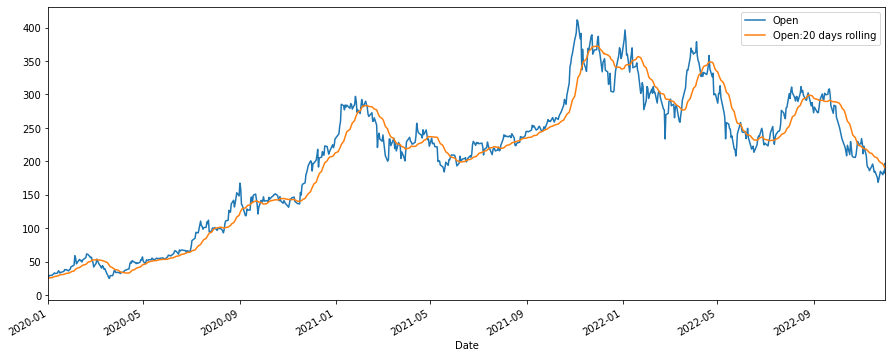

In [19]:
# Now try different - different rolling -->20
df_tesla['Open:20 days rolling'] = df_tesla['Open'].rolling(window = 20, min_periods = 1).mean()
df_tesla[['Open','Open:20 days rolling']].plot(xlim = ['2020-01-01','2022-12-01'],figsize = (15,6))

<AxesSubplot:xlabel='Date'>

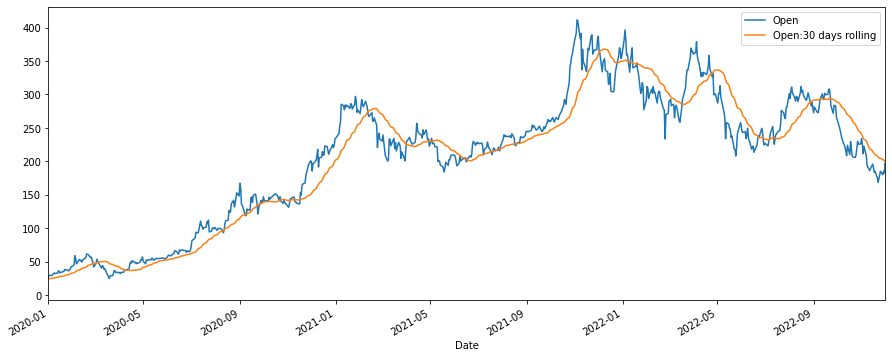

In [20]:
# Now try different - different rolling -->30
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tesla[['Open','Open:30 days rolling']].plot(xlim = ['2020-01-01','2022-12-01'],figsize = (15,6))

<AxesSubplot:xlabel='Date'>

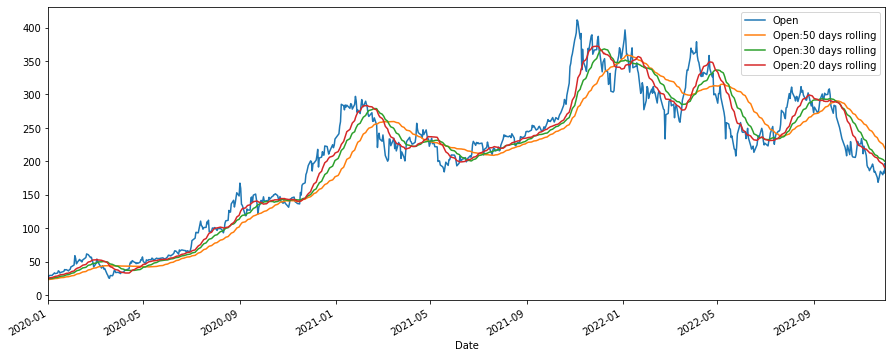

In [23]:
# Now try different - different rolling -->50
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window = 50, min_periods = 1).mean()
df_tesla[['Open','Open:50 days rolling','Open:30 days rolling','Open:20 days rolling']].plot(xlim = ['2020-01-01','2022-12-01'],figsize = (15,6))

## Cummulative Moving Average:-

In [24]:
df_tesla['Open'].expanding()

Expanding [min_periods=1,center=False,axis=0]

<AxesSubplot:xlabel='Date'>

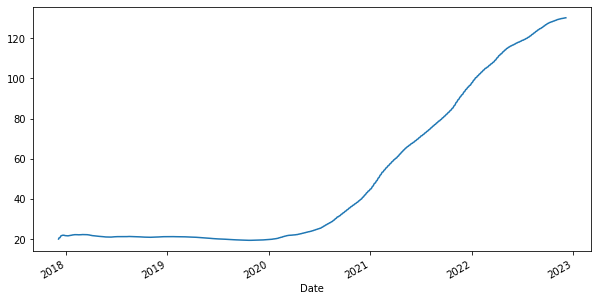

In [26]:
# CMA ----> #Expanding
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

This is the "Cummulative Moving Average" of the Open Tesla Stocks

### EWMA:- Exponential weigted moving avg.
* Our focus should be more on current/ upcomming/ recent data
* IMp:- To Prevent any kind of lags
* alpha -> hyperparameter "smotting is pretter much better without any lag"

In [27]:
# Ema tesla share
# alpha --> smoothing factor(0.1)
df_tesla['EWMA_0.1'] = df_tesla['Open'].ewm(alpha = 0.1, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

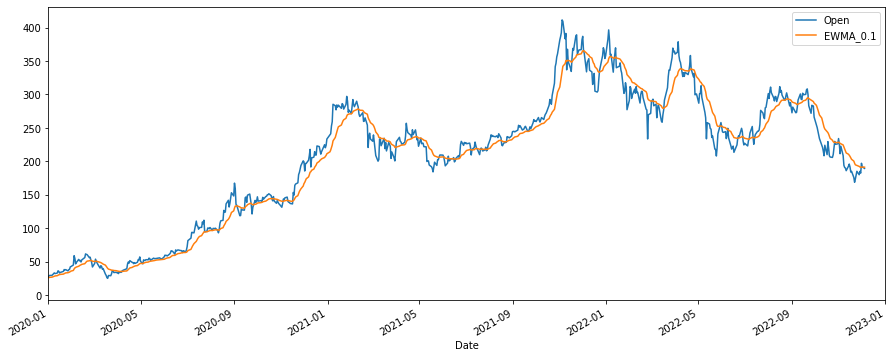

In [31]:
df_tesla[['Open','EWMA_0.1']].plot(xlim = ['2020-01-01','2023-01-01'],figsize = (15,6))

Advantage :- removing the lag amd try to find out "EWMA" and which is pretty much better than the "Simple Moving Average"

<AxesSubplot:xlabel='Date'>

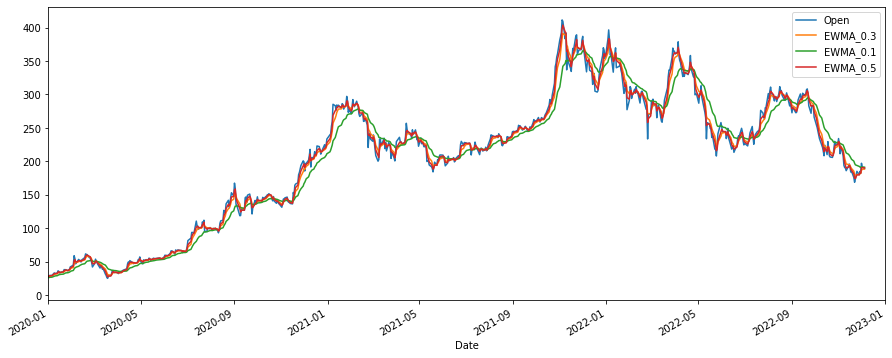

In [32]:
# if we want to make graph more smooth so let's ply with different different factor
df_tesla['EWMA_0.3'] = df_tesla['Open'].ewm(alpha = 0.3, adjust = False).mean()
df_tesla['EWMA_0.5'] = df_tesla['Open'].ewm(alpha = 0.5, adjust = False).mean()
df_tesla[['Open','EWMA_0.3','EWMA_0.1','EWMA_0.5']].plot(xlim = ['2020-01-01','2023-01-01'],figsize = (15,6))

<AxesSubplot:xlabel='Date'>

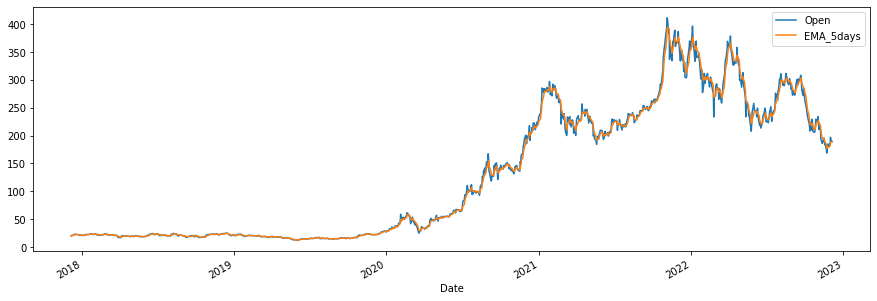

In [37]:
# ewma:--  "Span"
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span = 5).mean()
df_tesla[['Open','EMA_5days']].plot(figsize = (15,5))

### EMA --> Exponential Moving Average
* focus on the "recent data" by provinding some value or multiplying with some values and based on that we will try to see what are the value we will be getting

#### Formula :- Exponential Moving Average
((columns - Prev EMA)*multiplier)+PrevEMA
* multiplier -- (2/(rolling_window_size + 1))
* First row Prev(EMA) will be --> SimpleMean

### Note:-
* EWMA is best among all